In [1]:
import numpy as np

In [2]:
# data loading and generation
def Normalize(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  norm_data = numerator / (denominator + 1e-7)
  return norm_data

In [3]:
dta = np.arange(10)
dta = np.concatenate((dta, dta))
# dta = np.stack((dta, dta))
# dta
Normalize(dta)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555555, 0.66666666, 0.77777777, 0.88888888, 0.99999999,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555555, 0.66666666, 0.77777777, 0.88888888, 0.99999999])

In [4]:
def Normalize2(dta):
  return (dta - np.min(dta, 0)) /  (np.max(dta, 0) - np.min(dta, 0) + 1e-7)

In [5]:
def Normalize3(dta):
  min = np.min(np.min(data, axis = 0), axis = 0)
  dta = dta - min

  max = np.max(np.max(dta, axis = 0), axis = 0)
  norm_dta = dta / (max + 1e-7)
  return norm_dta, min, max

In [6]:
Normalize2(dta)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555555, 0.66666666, 0.77777777, 0.88888888, 0.99999999,
       0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555555, 0.66666666, 0.77777777, 0.88888888, 0.99999999])

In [7]:
def sine_data_generation(no, seq_len, dim):
  # number of samples, length of time series, feature dims
  data = list()

  for i in range(no):
    temp = list()
    for k in range(dim):
      freq = np.random.uniform(0, 0.1)
      phase = np.random.uniform(0, 0.1)
      # gen sine signal based on freq and phase
      temp_data = [np.sin(freq * j + phase) for j in range(seq_len)]
      temp.append(temp_data)
    # transpose
    temp = np.transpose(np.asarray(temp))
    # normalize data
    temp = (temp + 1) * 0.5   
    data.append(temp)
  return data

In [8]:
dta = sine_data_generation(1, 100, 1)

In [9]:
def sine_data_generation_orig (no, seq_len, dim):
  """Sine data generation.
  
  Args:
    - no: the number of samples
    - seq_len: sequence length of the time-series
    - dim: feature dimensions
    
  Returns:
    - data: generated data
  """  
  # Initialize the output
  data = list()

  # Generate sine data
  for i in range(no):      
    # Initialize each time-series
    temp = list()
    # For each feature
    for k in range(dim):
      # Randomly drawn frequency and phase
      freq = np.random.uniform(0, 0.1)            
      phase = np.random.uniform(0, 0.1)
          
      # Generate sine signal based on the drawn frequency and phase
      temp_data = [np.sin(freq * j + phase) for j in range(seq_len)] 
      temp.append(temp_data)
        
    # Align row/column
    temp = np.transpose(np.asarray(temp))        
    # Normalize to [0,1]
    temp = (temp + 1)*0.5
    # Stack the generated data
    data.append(temp)
                
  return data

In [10]:
import matplotlib.pyplot as plt
dta[0].shape[0]
x = np.arange(dta[0].shape[0])
y = dta[0] 
x = np.transpose(x)
y = np.transpose(y)
y = y[0]
x.shape

(100,)

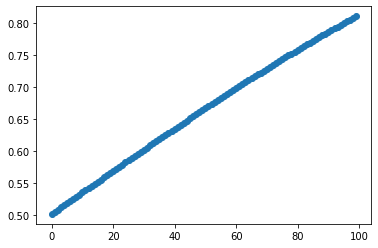

In [11]:
plt.scatter(x,y)

In [12]:
dta = sine_data_generation(2, 10, 3)

In [13]:
dta

[array([[0.50170776, 0.51355643, 0.53967664],
        [0.52728952, 0.51426388, 0.5800946 ],
        [0.55279978, 0.51497131, 0.61998155],
        [0.57817171, 0.51567871, 0.65907307],
        [0.60333883, 0.51638608, 0.69710997],
        [0.62823522, 0.51709342, 0.73384009],
        [0.65279565, 0.51780072, 0.76901993],
        [0.67695576, 0.51850799, 0.80241623],
        [0.70065227, 0.51921522, 0.83380761],
        [0.72382308, 0.51992241, 0.86298594]]),
 array([[0.53740735, 0.5356633 , 0.54567212],
        [0.57061955, 0.57842932, 0.56664778],
        [0.60351648, 0.62061399, 0.58750465],
        [0.63595128, 0.66190462, 0.60820555],
        [0.66777914, 0.70199515, 0.62871358],
        [0.69885798, 0.74058841, 0.6489922 ],
        [0.72904904, 0.77739834, 0.66900524],
        [0.75821755, 0.81215207, 0.68871705],
        [0.78623328, 0.84459202, 0.70809249],
        [0.81297116, 0.87447771, 0.72709703]])]

In [14]:
np.random.seed(1)
dta1 = sine_data_generation(1, 10, 1)
np.random.seed(1)
dta2 = sine_data_generation_orig(1, 10, 1)
dta1, dta2

([array([[0.53598509],
         [0.5567448 ],
         [0.57740585],
         [0.5979323 ],
         [0.61828847],
         [0.63843895],
         [0.65834871],
         [0.67798313],
         [0.69730807],
         [0.71628993]])], [array([[0.53598509],
         [0.5567448 ],
         [0.57740585],
         [0.5979323 ],
         [0.61828847],
         [0.63843895],
         [0.65834871],
         [0.67798313],
         [0.69730807],
         [0.71628993]])])

In [15]:
sum(dta1[0] == dta2[0])

array([10])

In [16]:
def real_data_loading (data_name, seq_len):
  """Load and preprocess real-world datasets.
  
  Args:
    - data_name: stock or energy
    - seq_len: sequence length
    
  Returns:
    - data: preprocessed data.
  """  
  assert data_name in ['stock','energy']
  
  if data_name == 'stock':
    ori_data = np.loadtxt('data/stock_data.csv', delimiter = ",",skiprows = 1)
  elif data_name == 'energy':
    ori_data = np.loadtxt('data/energy_data.csv', delimiter = ",",skiprows = 1)
        
  # Flip the data to make chronological data
  ori_data = ori_data[::-1]
  # Normalize the data
  ori_data = MinMaxScaler(ori_data)
    
  # Preprocess the dataset
  temp_data = []    
  # Cut data by sequence length
  for i in range(0, len(ori_data) - seq_len):
    _x = ori_data[i:i + seq_len]
    temp_data.append(_x)
        
  # Mix the datasets (to make it similar to i.i.d)
  idx = np.random.permutation(len(temp_data))    
  data = []
  for i in range(len(temp_data)):
    data.append(temp_data[idx[i]])
    
  return data

In [17]:
def train_test_divide (data_x, data_x_hat, data_t, data_t_hat, train_rate = 0.8):
  """Divide train and test data for both original and synthetic data.
  
  Args:
    - data_x: original data
    - data_x_hat: generated data
    - data_t: original time
    - data_t_hat: generated time
    - train_rate: ratio of training data from the original data
  """
  # Divide train/test index (original data)
  no = len(data_x)
  idx = np.random.permutation(no)
  train_idx = idx[:int(no*train_rate)]
  test_idx = idx[int(no*train_rate):]
    
  train_x = [data_x[i] for i in train_idx]
  test_x = [data_x[i] for i in test_idx]
  train_t = [data_t[i] for i in train_idx]
  test_t = [data_t[i] for i in test_idx]      
    
  # Divide train/test index (synthetic data)
  no = len(data_x_hat)
  idx = np.random.permutation(no)
  train_idx = idx[:int(no*train_rate)]
  test_idx = idx[int(no*train_rate):]
  
  train_x_hat = [data_x_hat[i] for i in train_idx]
  test_x_hat = [data_x_hat[i] for i in test_idx]
  train_t_hat = [data_t_hat[i] for i in train_idx]
  test_t_hat = [data_t_hat[i] for i in test_idx]
  
  return train_x, train_x_hat, test_x, test_x_hat, train_t, train_t_hat, test_t, test_t_hat


def extract_time (data):
  """Returns Maximum sequence length and each sequence length.
  
  Args:
    - data: original data
    
  Returns:
    - time: extracted time information
    - max_seq_len: maximum sequence length
  """
  time = list()
  max_seq_len = 0
  for i in range(len(data)):
    max_seq_len = max(max_seq_len, len(data[i][:,0]))
    time.append(len(data[i][:,0]))
    
  return time, max_seq_len

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# helper to decide which architecture to use
def rnn_cell(module_name, hidden_dim, num_inputs):
  assert module_name in ["gru", "lstm", "lstmLN", "AdaFNN"]
  if (module_name == "gru"):
    rnn_cell = nn.GRUCell(input_size = num_inputs, hidden_size=hidden_dim)
    # no activation function probably need to reimplement these layers to match 
    # the tf implementation 
    # also not sure about bias default in tf
  elif (module_name == "lstm"):
    rnn_cell = nn.LSTMCell(input_size=num_inputs, hidden_size=hidden_dim)
  elif (module_name == "lstmLN"): 
    pass
    # need to implement
  elif (module_name == "AdaFNN"):
    pass
    # need to implement
  return rnn_cell

# https://github.com/daehwannam/pytorch-rnn-util/blob/ba4d5ada3581fd6711f792d3fe79e58755613ba9/rnn_util/seq.py

In [19]:
def random_generator (batch_size, z_dim, T_mb, max_seq_len):
  """Random vector generation.
  
  Args:
    - batch_size: size of the random vector
    - z_dim: dimension of random vector
    - T_mb: time information for the random vector
    - max_seq_len: maximum sequence length
    
  Returns:
    - Z_mb: generated random vector
  """
  Z_mb = list()
  for i in range(batch_size):
    temp = np.zeros([max_seq_len, z_dim])
    temp_Z = np.random.uniform(0., 1, [T_mb[i], z_dim])
    temp[:T_mb[i],:] = temp_Z
    Z_mb.append(temp_Z)
  return Z_mb

In [20]:
torch.manual_seed(1)
rnn = nn.GRUCell(5, 10)
#rnn = nn.GRUCell(10, 20)
input = torch.randn(1, 5)
hx = torch.randn(1, 10)
res1 = rnn(input, hx)
res1

tensor([[-0.2808,  0.4106, -0.7252, -0.6151, -0.5328,  0.8263, -0.6560, -0.5309,
          0.5347,  0.0276]], grad_fn=<AddBackward0>)

In [21]:
def batch_generator(data, time, batch_size):
  """Mini-batch generator.
  
  Args:
    - data: time-series data
    - time: time information
    - batch_size: the number of samples in each batch
    
  Returns:
    - X_mb: time-series data in each batch
    - T_mb: time information in each batch
  """
  no = len(data)
  idx = np.random.permutation(no)
  train_idx = idx[:batch_size]     
            
  X_mb = list(data[i] for i in train_idx)
  T_mb = list(time[i] for i in train_idx)
  
  return X_mb, T_mb

In [22]:
def timegan(ori_data, parameters):
  # Basic Parameters
  no, seq_len, dim = np.asarray(ori_data).shape
  # max seq length and each sequence length
  ori_time, max_seq_len = extract_time(ori_data)
  # Normalization
  ori_data, min, max = Normalize3(ori_data)
  # Network Params
  hidden_dim   = parameters['hidden_dim'] 
  num_layers   = parameters['num_layer']
  iterations   = parameters['iterations']
  batch_size   = parameters['batch_size']
  module_name  = parameters['module'] 
  z_dim        = dim
  gamma        = 1
  # need to implement cells from scratch and bundle them up into the multi rnn cell
  # https://r2rt.com/recurrent-neural-networks-in-tensorflow-ii.html
  # actually we only have to use torch.nn.RNN, has a num_layers argument, also has a tanh argument
  # so we don't even need to do it with cells i think!
  # dynamic versions 
  # https://github.com/songyouwei/ABSA-PyTorch/blob/master/layers/dynamic_rnn.py


In [23]:
def timegan(ori_data, parameters):
  no, seq_len, dim = np.asarray(ori_data).shape
  ori_time, max_seq_len = extract_time(ori_data)
  ori_data, min, max = Normalize3(ori_data)
  # Network Params
  hidden_dim   = parameters['hidden_dim'] 
  num_layers   = parameters['num_layer']
  iterations   = parameters['iterations']
  batch_size   = parameters['batch_size']
  module_name  = parameters['module'] 
  z_dim        = dim
  gamma        = 1
  input_dim    = 10 # todo set input dim dependent on original data
  # Inputs are X, Z and T
  def embedder(X, T):
    # X input time series features, T input time information 
    # bias is initialized to ones by default in tensorflow 1.x
    # todo: wrap the if elif stuff in a function
    if (module_name == "rnn"): # "todo:dependent on ori_data"
      e_cell = torch.nn.RNN(input_size = input_dim, hidden_size = hidden_dim, 
                            num_layers = num_layers, nonlinearity="tanh", bias = True, batch_first= True)
    elif (module_name == "lstm"):
      pass
    elif (module_name == "gru"):
      pass
    elif (module_name == "adafnn"):
      pass
    # compute outputs
    # dynamic rnn here https://github.com/songyouwei/ABSA-PyTorch/blob/master/layers/dynamic_rnn.py
    # else we can just use the regular RNN function
    # initialize h0 as learnable parameter? 
    h0 = torch.randn(num_layers, batch_size, hidden_size)
    e_outputs, e_last_states = e_cell(X, h0)
    # pass through fully connected layer 
    H = torch.sigmoid(nn.linear(e_outputs, hidden_dim))
    return H
    
  def recovery (H, T):
    if (module_name == "rnn"):
      r_cell = torch.nn.RNN(input_size = input_dim, hidden_size = hidden_dim, 
                            num_layers = num_layers, nonlinearity="tanh", bias = True, batch_first= True)
    elif (module_name == "lstm"):
      pass
    elif (module_name == "gru"):
      pass
    elif (module_name == "adafnn"):
      pass
  
    # get recovery
    h0 = torch.randn(num_layers, batch_size, hidden_size)
    r_outputs, r_last_states = r_cell(H, h0)
    X_tilde = torch.sigmoid(nn.linear(r_outputs, dim)) # dimension of original data
    return X_tilde
  
  def generator(Z, T):
    # todo: define get_RNN function
    e_cell = get_RNN(module_name, hidden_dim, input_dim, num_layers)
    h0 = torch.randn(num_layers, batch_size, hidden_size)
    e_outputs, e_last_states = e_cell(Z, h0)
    E = torch.sigmoid(nn.linear(e_outputs, hidden_dim))
    return E
  
  def supervisor(H, T):
    # todo: Wrap all this in another function so we can dynamically adjust everything
    # with a single function call
    e_cell = get_RNN(module_name, hidden_dim, input_dim, num_layers)
    h0 = torch.randn(num_layers, batch_size, hidden_size)
    e_outputs, e_last_states = e_cell(H, h0)
    S = torch.sigmoid(nn.linear(e_outputs, hidden_dim))
    return S

  def discriminator(H, T):
    # todo: add dynamic sequence length 
    d_cell = getRNN(module_name, hidden_dim, input_dim, num_layers)
    h0 = torch.randn(num_layers, batch_size, hidden_size)
    d_outputs, d_last_states = d_cell(H, h0)
    Y_hat = nn.linear(d_outputs, 1)
    return Y_hat

  # Embedder & Recovery
  H = embedder(X, T)
  X_tilde = recovery(H, T)
    
  # Generator
  E_hat = generator(Z, T)
  H_hat = supervisor(E_hat, T)
  H_hat_supervised = supervisor(H, T)
    
  # Synthetic data
  X_hat = recovery(H_hat, T)
    
  # Discriminator
  Y_fake = discriminator(H_hat, T)
  Y_real = discriminator(H, T)     
  Y_fake_e = discriminator(E_hat, T)

  # i think parameters are trainable by default in pytorch (?)
  # if it doesn't work we need to add as torch parameter
  # self.alpha = nn.Parameter(torch.tensor(0.5, requires_grad=True))
  # https://discuss.pytorch.org/t/how-to-make-a-tensor-part-of-model-parameters/51037/6

  # Discriminator loss 
  # i think we need to use logits, not 100% sure
  # D_loss_real = nn.BCELoss(torch.ones_like(Y_real), Y_real)
  D_loss_real = nn.BCEWithLogitsLoss(torch.ones_like(Y_real), Y_real)
  D_loss_fake = nn.BCEWithLogitsLoss(torch.zeros_like(Y_fake), Y_fake)
  D_loss_fake_e = nn.BCEWithLogitsLoss(torch.zeros_like(Y_fake_e), Y_fake_e)
  D_loss = D_loss_real + D_loss_fake + gamma * D_loss_fake_e

  # Generator loss
  # Adversarial loss
  G_loss_U = nn.BCEWithLogitsLoss(torch.ones_like(Y_fake), Y_fake)
  G_loss_U_e = nn.BCEWithLogitsLoss(torch_ones_like(Y_fake_e), Y_fake_e)

  # Supervised loss
  # h is the return value of the embedding network => need to pay attention to 
  # shapes of returned tensors
  G_loss_S = nn.MSELoss(H[:,1,:], H_hat_supervised[:,:-1,:])

  # two moments
  # x is placeholder of shape [None, max_seq_len, dim]
  # None => keeps batch size flexible
  # we use the first axis to normalize => batch norm
  # returns mean and variance, we only care about the variance
  # G_loss_V1 = tf.reduce_mean(tf.abs(tf.sqrt(tf.nn.moments(X_hat,[0])[1] + 1e-6) - tf.sqrt(tf.nn.moments(X,[0])[1] + 1e-6)))
  # G_loss_V1 = tf.reduce_mean(tf.abs(tf.sqrt(BatchVariance_hat + 1e-6) - tf.sqrt(BatchVariance + 1e-6)))
  # G_loss_V1 = tf.reduce_mean(tf.abs(BatchStd_hat - Batch_Std))
  # no dimension is given, thus we return a single value, the batch mean of the abs of the differences of vars
  # torch.var_mean returns a tuple (var, mean) => 0th element is variance
  # tf.nn.moments does not use bessels correction
  # i think we dont have to reduce in the end since we should obtain a one dimensional tensor, need to test
  G_loss_V1 = torch.mean(torch.abs((torch.std(X_hat, [0], unbiased = False)) + 1e-6 - (torch.std(X, [0]) + 1e-6)))
  # G_loss_V2 = tf.reduce_mean(tf.abs((tf.nn.moments(X_hat,[0])[0]) - (tf.nn.moments(X,[0])[0])))
  G_loss_V2 = torch.mean(torch.abs((torch.mean(X_hat, [0]) - (torch.mean(X, [0])))))
  G_loss_V = G_loss_V1 + G_loss_V2
  # sum everything up
  G_loss = G_loss_U + gamma * G_loss_U_e + 100 * tf.sqrt(G_loss_S) + 100*G_loss_V 

  # Embedder network loss
  E_loss_T0 = nn.MSELoss(X, X_tilde)
  E_loss0 = 10 * torch.sqrt(E_loss_T0)
  E_loss = E_loss0  + 0.1 * G_loss_S

  # training is done in 4 distinct training loops
  

In [24]:
nn.BCELoss(torch.ones(1), torch.zeros(1))

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


BCELoss()

In [25]:
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(input, target)
output

tensor(0.9558, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [26]:
test = torch.nn.RNN(input_size = 5, hidden_size= 10, num_layers=2, nonlinearity="tanh", bias = True, batch_first=True)
input = torch.randn(1, 10, 5)
h0 = torch.randn(2, 1, 10)
output, hn = test(input, h0)
output

tensor([[[ 0.6440,  0.4090,  0.6669, -0.7245,  0.9293, -0.8816,  0.2027,
           0.0604, -0.7681,  0.1004],
         [ 0.8545,  0.6267, -0.2362,  0.1335,  0.6135, -0.3519, -0.4598,
           0.1437, -0.6159,  0.3881],
         [ 0.5354,  0.3174,  0.3125, -0.0881,  0.3082, -0.4653, -0.2973,
           0.0196, -0.1805,  0.5621],
         [ 0.1535, -0.1906,  0.2505, -0.4002,  0.4702, -0.4689, -0.4161,
           0.0950, -0.5879,  0.5591],
         [ 0.2362,  0.0858,  0.0666, -0.2530,  0.5588, -0.2973, -0.1830,
           0.1253, -0.2696,  0.2916],
         [ 0.1430, -0.1385,  0.0664, -0.2075,  0.5770, -0.1295, -0.1648,
           0.2977, -0.1752,  0.2234],
         [ 0.2326, -0.2248,  0.2384, -0.2234,  0.7741, -0.4528, -0.1645,
           0.1504, -0.2843,  0.6134],
         [ 0.1824, -0.0494, -0.2474, -0.2566,  0.4945,  0.0823, -0.0281,
           0.3909, -0.0203,  0.0955],
         [-0.2310, -0.4456, -0.0093, -0.3309,  0.5148, -0.1646, -0.0289,
          -0.0672,  0.0557,  0.3293],
 